#  Project: Medical Appointment No Shows 

##  Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction


Content

110.527 medical appointments its 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment. Variable names are self-explanatory, if you have doubts, just let me know!

scholarship variable means this concept = https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia

14 variables

Data Dictionary

01 - PatientId

Identification of a patient

02 - AppointmentID

Identification of each appointment

03 - Gender

Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.

04 - ScheduledDay

The day of the actuall appointment, when they have to visit the doctor.

05 - AppointmentDay

The day someone called or registered the appointment, this is before appointment of course.

06 - Age

How old is the patient.

07 - Neighbourhood

Where the appointment takes place.

08 - Scholarship

True of False . Observation, this is a broad topic, consider reading this article
https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia

09 - Hipertension

True or False

10 - Diabetes

True or False

11 - Alcoholism

True or False

12 - Handcap

True or False

13 - SMS_received

1 or more messages sent to the patient.

14 - No-show


True or False.


#### This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

I took the dataset from https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True

Q1.whose most Absent or Present patient 

Q2.who have more appointment Male or Female and 

Q3. who Present more patient with Scholarship or without Scholarship 

Q4. who Present more patient with Hypertension or without Hypertension 

Q5. who Present more patient with Diabetes or without Diabetes  

Q6. who Present more patient with Alcoholism or without Alcoholism 

Q7. who Present more patient with Handicap or without Handicap 

Q8. who Present more patient who SMS_received or don't SMS_received 

Q9.who take more appointment based on Age











so first i will import my packages



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
#read my csv file
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [3]:
#print the shape of data
df.shape

(110527, 14)

In [4]:
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [5]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning 

In [6]:
# change ScheduledDay from object to datetime64[ns]
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')

In [7]:
# change AppointmentDay from object to datetime64[ns]
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), float64(1), in

In [9]:
df.head()

PatientId  AppointmentID Gender ScheduledDay AppointmentDay  Age  \
0  2.987250e+13        5642903      F   2016-04-29     2016-04-29   62   
1  5.589978e+14        5642503      M   2016-04-29     2016-04-29   56   
2  4.262962e+12        5642549      F   2016-04-29     2016-04-29   62   
3  8.679512e+11        5642828      F   2016-04-29     2016-04-29    8   
4  8.841186e+12        5642494      F   2016-04-29     2016-04-29   56   

       Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA            0             1         0           0   
1    JARDIM DA PENHA            0             0         0           0   
2      MATA DA PRAIA            0             0         0           0   
3  PONTAL DE CAMBURI            0             0         0           0   
4    JARDIM DA PENHA            0             1         1           0   

   Handcap  SMS_received No-show  
0        0             0      No  
1        0             0      No  
2        0             0      No  
3        0             0      No  
4        0             0      No

#### now we have some mistake spilling in some rows we will rename it

In [10]:
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap','No-show': 'Absent' })

####  check dublicate value

In [11]:
sum(df.duplicated())

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hypertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handicap        110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  Absent          110527 non-null  object        
dtypes: datetime64[ns](2), float64(1), in

#### as we see we don't ha null value in this data 
in next code we will see the unique value for rows 
i took info from https://www.geeksforgeeks.org/get-unique-values-from-a-column-in-pandas-dataframe/

In [13]:
df.Age.unique() 

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [14]:
df.Neighbourhood.unique() 

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [15]:
print (df.Neighbourhood.unique().size)

81


In [16]:
df.Gender.unique()

array(['F', 'M'], dtype=object)

In [17]:
df.Scholarship.unique() 

array([0, 1])

In [18]:
df.Hypertension.unique()

array([1, 0])

In [19]:
df.Diabetes.unique()

array([0, 1])

In [20]:
df.Alcoholism.unique()

array([0, 1])

In [21]:
df.Handicap.unique()

array([0, 1, 2, 3, 4])

In [22]:
df.SMS_received.unique() 

array([0, 1])

#### so we will change the tybe of data 
that have 1 = yes and 0 = no to object

https://www.geeksforgeeks.org/change-data-type-for-one-or-more-columns-in-pandas-dataframe/

In [23]:
df ['Scholarship'] = df ['Scholarship'].astype('object')

In [24]:
print(df.dtypes)

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship               object
Hypertension               int64
Diabetes                   int64
Alcoholism                 int64
Handicap                   int64
SMS_received               int64
Absent                    object
dtype: object


####  so here i will continue with the rest 

In [25]:
df ['Hypertension'] = df ['Hypertension'].astype('object')
df ['Diabetes'] = df ['Diabetes'].astype('object')
df ['Alcoholism'] = df ['Alcoholism'].astype('object')
df ['Handicap'] = df ['Handicap'].astype('object')
df ['SMS_received'] = df ['SMS_received'].astype('object')

In [26]:
print(df.dtypes)

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship               object
Hypertension              object
Diabetes                  object
Alcoholism                object
Handicap                  object
SMS_received              object
Absent                    object
dtype: object


#### so we see that when i print age of patient there is a -1 value i will check it 

In [27]:
print (df[df.Age == -1].shape)

(1, 14)


#### i will find the location of the data -1 and i will drop it
https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/

In [28]:
df.loc[(df['Age'] == -1)] 

PatientId  AppointmentID Gender ScheduledDay AppointmentDay  Age  \
99832  4.659432e+14        5775010      F   2016-06-06     2016-06-06   -1   

      Neighbourhood Scholarship Hypertension Diabetes Alcoholism Handicap  \
99832         ROMÃO           0            0        0          0        0   

      SMS_received Absent  
99832            0     No

In [29]:
df.drop ([99832], inplace = True )

In [30]:
df.loc[(df['Age'] == -1)]

Empty DataFrame
Columns: [PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hypertension, Diabetes, Alcoholism, Handicap, SMS_received, Absent]
Index: []

<a id='eda'></a>
## Exploratory Data Analysis

In [31]:
import seaborn as sns

https://seaborn.pydata.org/generated/seaborn.countplot.html

### q1.whose most Absent or Present patient 

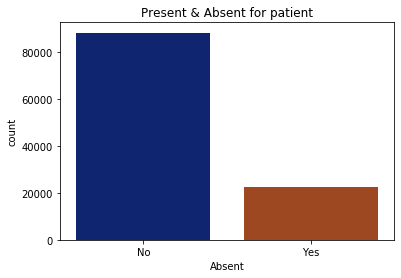

In [90]:
ax = sns.countplot(x="Absent", data=df, palette="dark").set(title='Present & Absent for patient')

 we see here that most of patient are Present 

### Q2.who have more appointment Male or Female and 



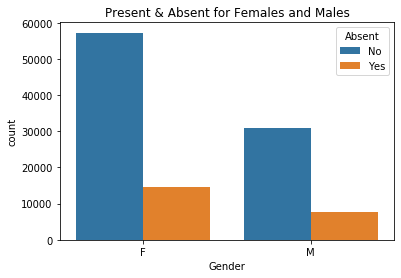

In [91]:
ax = sns.countplot(x="Gender", hue="Absent", data=df)
plt.title('Present & Absent for Females and Males');

 we can see above that Female are taking more appointment than male 

### Q3. who Present more patient with Scholarship or without Scholarship 



In [34]:
pd.crosstab(df['Scholarship'],df['Absent'],).apply(lambda r: r/r.sum(), axis=1)

Absent             No       Yes
Scholarship                    
0            0.801926  0.198074
1            0.762637  0.237363

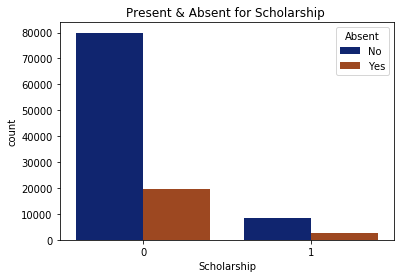

In [84]:
ax = sns.countplot(x="Scholarship", hue="Absent", data=df, palette="dark").set(title = 'Present & Absent for Scholarship ')

 
we can see that 80% of patient without Scholarship are Present

and 76% of patient with Scholarship are Present 

so Scholarship effect if the patients are going to come or not 

### Q4. who Present more patient with Hypertension or without Hypertension 



In [36]:
pd.crosstab(df['Hypertension'],df['Absent'],).apply(lambda r: r/r.sum(), axis=1)

Absent              No       Yes
Hypertension                    
0             0.790961  0.209039
1             0.826980  0.173020

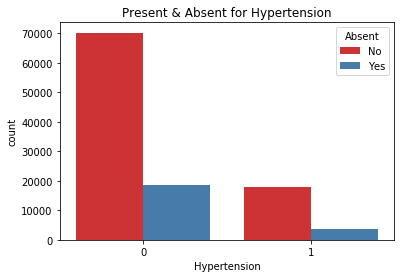

In [85]:
ax = sns.countplot(x="Hypertension", hue="Absent", data=df, palette="Set1").set(title = 'Present & Absent for Hypertension')

 
so we can see above that patient with Hypertension 82% are Present

and 79% of patient who don't have Hypertension are Present 

so if the patient have Hypertension we can predict if he will come or not 

### Q5. who Present more patient with Diabetes or without Diabetes 



In [38]:
pd.crosstab(df['Diabetes'],df['Absent'],).apply(lambda r: r/r.sum(), axis=1)

Absent          No       Yes
Diabetes                    
0         0.796370  0.203630
1         0.819967  0.180033

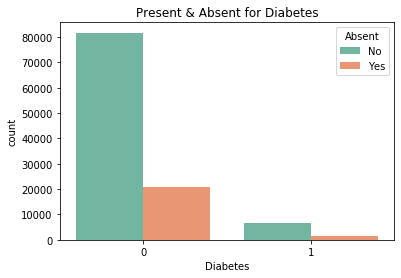

In [86]:
ax = sns.countplot(x="Diabetes", hue="Absent", data=df, palette="Set2")
plt.title('Present & Absent for Diabetes');

so we see above that patient who have Diabetes and Present are 81%

and patient who don't have Diabetes and Present are around 79%

so we can predict if the patient have Diabetes will come or not

### Q6. who Absent more patient with Alcoholism or without Alcoholism 




In [40]:
pd.crosstab(df['Alcoholism'],df['Absent'],).apply(lambda r: r/r.sum(), axis=1)

Absent            No       Yes
Alcoholism                    
0           0.798052  0.201948
1           0.798512  0.201488

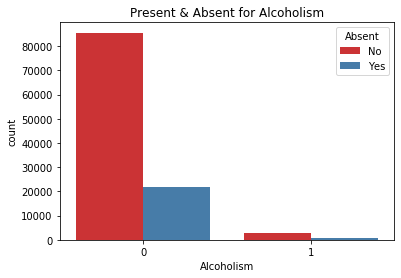

In [87]:
ax = sns.countplot(x="Alcoholism", hue="Absent", data=df, palette="Set1").set(title = ('Present & Absent for Alcoholism'))

so we can see that the  patient without Alcoholism are around 80% of them are Present and the same for patient with alcoholism

so percent is same it may not help us to predict who will Absent or Present 

### Q7. who Present more patient with Handicap or without Handicap 



In [42]:
pd.crosstab(df['Handicap'],df['Absent'],).apply(lambda r: r/r.sum(), axis=1)

Absent          No       Yes
Handicap                    
0         0.797645  0.202355
1         0.820764  0.179236
2         0.797814  0.202186
3         0.769231  0.230769
4         0.666667  0.333333

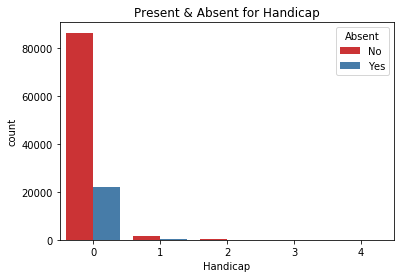

In [88]:
ax = sns.countplot(x="Handicap", hue="Absent", data=df, palette="Set1")
plt.title('Present & Absent for Handicap');

as we see in visualization most of patient without Handicap and around 80% of them are present 

and we can see the levels of Handicap will help us to now if the patient will Present or Absent 

### Q8. who Present more patient who SMS_received or don't SMS_received 



In [44]:
pd.crosstab(df['SMS_received'],df['Absent'],).apply(lambda r: r/r.sum(), axis=1)

Absent              No       Yes
SMS_received                    
0             0.832965  0.167035
1             0.724255  0.275745

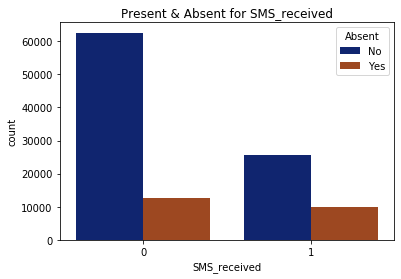

In [89]:
ax = sns.countplot(x="SMS_received", hue="Absent", data=df, palette="dark")
plt.title('Present & Absent for SMS_received');

so we can see that more patient don't receive sms and around 83% Present and patient who receive sms and Present are around 72%

### Q9.who take more appointment based on Age



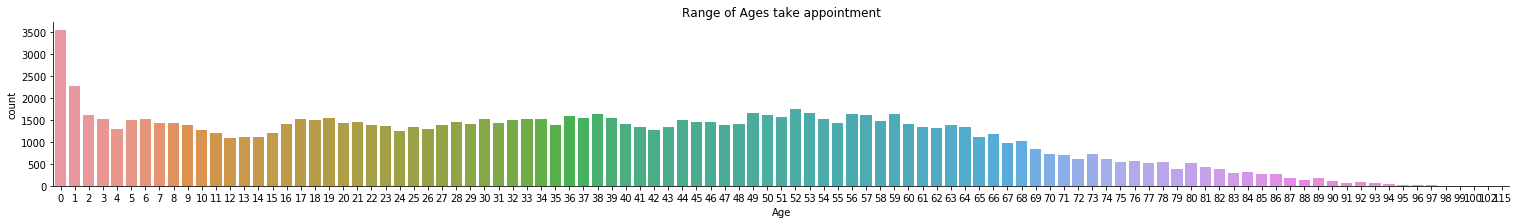

In [81]:
g = sns.catplot(x="Age", 
                data=df, kind="count",
                height=3, aspect=7);
plt.title('Range of Ages take appointment');

we see that 0 and 1 have more appointment and the rate from 2 to 59 almost the same and then start decreasing

### LImitations

This dataset collects information from 100k medical appointments in Brazil so it's not effect other patient in other countrys if we have a bigger data set word we could predict more 

so it's limited on the place that collected from 



 <a id='conclusions'></a>
 # Conclusions

so we can see that Gender may not effect in patient who Absent or Present because most of patient are Female but we can see the distribution of Female and Male is the nearly same 

and patient who have Scholarship Hypertension Diabetes are also effect on Absent or Present

and we can see that the percent of Present patient who have Alcoholism and without Alcoholism same so it may not help to predict if he will come or not 

and patient who don't receve sms are more Present than patient who receve sms and i think this is the opposite to what usually happens

and most patient age are 0 and 1  and the rate from Age 2 to Age 59 almost the same and then start decreasing